## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#sanity check
#print(mouse_metadata)
#print(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

#sanity check
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
len(merged_data)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.drop_duplicates("Mouse ID", keep = "last")

#sorting by Drug Regimen
sorted_clean_df = clean_df.sort_values(by = "Drug Regimen")

#sanity check
#sorted_clean_df

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

249

In [109]:
#visualize a df grouped by regimen
organized_no_count_df = clean_df.groupby("Drug Regimen")

organized_w_count_df = organized_no_count_df.count()

#sanity check
#organized_w_count_df

#checking the types
#organized_w_count_df.dtypes

In [8]:
#pulling the drug regimen names
drug_regimen = list(organized_w_count_df.index.values)

#sanity check
#drug_regimen

In [172]:
#df's with the seperate necessary calculations
mean_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#sanity check
#print(mean_df)

#sanity check
#print(median_df)

#sanity check
#print(var_df)

#sanity check
#print(std_df)

#sanity check
#print(sem_df)

Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.736964
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64


## Summary Statistics

In [10]:
#merge the calculations
first_merge_df = pd.merge(mean_df, median_df, on="Drug Regimen")

#adding variance to the df
second_merge_df = pd.merge(first_merge_df, var_df, on='Drug Regimen')

#renaming the columns to reflect the claculations we have so far
second_merge_df = second_merge_df.rename(columns={"Tumor Volume (mm3)_x":"Avg. Tumor Vol.","Tumor Volume (mm3)_y":"Median Tumor Vol.","Tumor Volume (mm3)":"Variance"})

#sanity check
#second_merge_df

third_merge_df = pd.merge(second_merge_df, std_df, on="Drug Regimen")

#rename the std column
third_merge_df = third_merge_df.rename(columns={"Tumor Volume (mm3)":"Standard Dev."})

#sanity check
#third_merge_df

#adding the sem column to the table
complete_stats_df = pd.merge(third_merge_df, sem_df, on="Drug Regimen")

#renaming the sem column
complete_stats_df = complete_stats_df.rename(columns={"Tumor Volume (mm3)":"Standard Error"})

#sanity check
complete_stats_df

,Avg. Tumor Vol.,Median Tumor Vol.,Variance,Standard Dev.,Standard Error
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

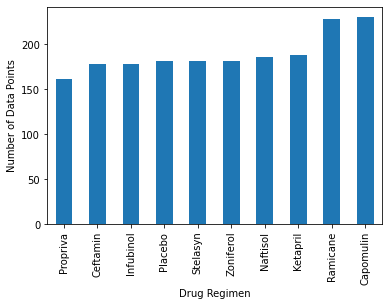

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#creating a df for both bar plots
barplot_data_df = merged_data.groupby("Drug Regimen").count()

#creating a df for the first bar plot
first_barplot_data = barplot_data_df.sort_values(by="Mouse ID", ascending = "False")

#create the first bar plot
first_barplot_data.plot.bar(y='Mouse ID', legend=None)

#add a y axis label
plt.ylabel("Number of Data Points")

#sanity check
plt.show()

In [12]:
#creating the drug list for the second bar plot
sorted_drug_list = list(barplot_data_df.sort_values("Mouse ID").index.values)

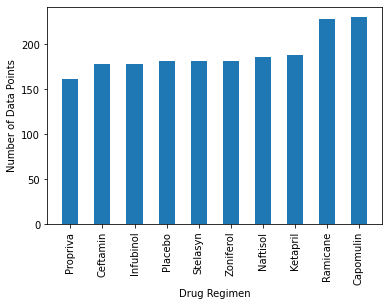

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#creating the x_axis values
x_axis = np.arange(len(barplot_data_df["Mouse ID"]))
#creating the y_axis values
y_axis = barplot_data_df["Mouse ID"].sort_values().tolist()

#creating the tick locations
tick_locations = [val for val in x_axis]

#creating the bones of the bar plot
plt.bar(x_axis, y_axis, width = 0.5)

#setting the tick names
plt.xticks(tick_locations, sorted_drug_list)

#plotting the ticks
plt.xticks(rotation = 90)

#adding labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

#sanity checkl
plt.show()

## Pie Plots

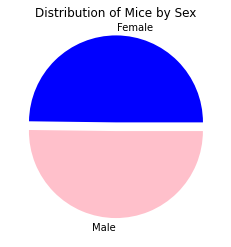

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#create the data for the pie plots
sex_df = clean_df.groupby("Sex").count()

#creating the pie chart
sex_df.plot.pie(y="Mouse ID", legend=None, colors = ['Blue', 'Pink'], explode=[0.1, 0])

#remocing the y label
plt.title('Distribution of Mice by Sex')
plt.ylabel('')

plt.show()

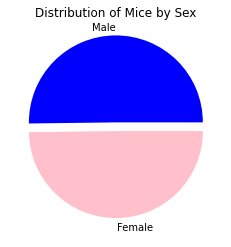

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#create the data for the pie plots
male_count = sex_df.loc['Male', 'Mouse ID']
female_count = sex_df.loc['Female', 'Mouse ID']

#creating a list to hold the values
sex_data = [male_count, female_count]

#creating the labels
labels = ["Male", "Female"]

#setting the colors for the chart
colors = ['Blue', 'Pink']

#create the pie chart
plt.pie(sex_data, labels=labels, colors=colors, explode = [0.1, 0])

#adding a title
plt.title('Distribution of Mice by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
qob_data = sorted_clean_df.set_index("Drug Regimen")

#grabbing the data for calculations and plotting
Capomulin = qob_data.loc["Capomulin"]["Tumor Volume (mm3)"]
#converting it to a list
Capomulin_list = Capomulin.tolist()

#grabbing the data for calculations and plotting
Ramicane = qob_data.loc["Ramicane"]["Tumor Volume (mm3)"]
#converting it to a list
Ramicane_list = Ramicane.tolist()

#grabbing the data for calculations and plotting
Infubinol = qob_data.loc["Infubinol"]["Tumor Volume (mm3)"]
#converting it to a list
Infubinol_list = Infubinol.tolist()

#grabbing the data for calculations and plotting
Ceftamin = qob_data.loc["Ceftamin"]["Tumor Volume (mm3)"]
#converting it to a list
Ceftamin_list = Ceftamin.tolist()

#creating the data for the boxplot
boxplot_data = [Capomulin_list, Ramicane_list, Infubinol_list, Ceftamin_list]

#creating labels for the boxplots
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


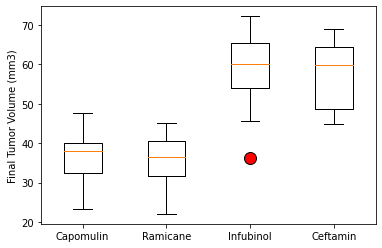

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

#modifying the marker shape and color
flierprops = dict(marker='o', markerfacecolor='red', markersize=12)

#setting the title
ax1.set_ylabel("Final Tumor Volume (mm3)")

#boxplot for Papomulin
ax1.boxplot(boxplot_data, flierprops = flierprops, labels = labels)

plt.show()

## Line and Scatter Plots

In [100]:
#rearranging the data to pull for the line plot
base_data = merged_data.set_index("Mouse ID")
line_scatter_data = base_data.sort_values(['Mouse ID', 'Timepoint'], ascending=[True, True])

#sanity check
line_scatter_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,0,45.000000,0
a203,Infubinol,Female,20,23,5,48.508468,0
a203,Infubinol,Female,20,23,10,51.852437,1
a203,Infubinol,Female,20,23,15,52.777870,1
a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


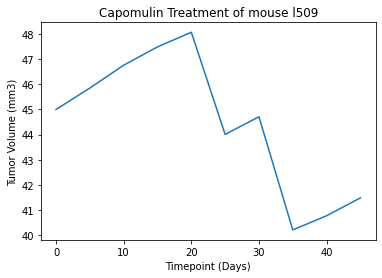

In [108]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#getting the data for the line plot
y_values = line_scatter_data.loc["l509"]["Tumor Volume (mm3)"]
x_values = line_scatter_data.loc["l509"]["Timepoint"]

#creating the plot
plt.plot(x_values, y_values)

#adding labels and a title
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")

plt.show()

In [230]:
#collecting the data for the scatterplot
scatter_data_df = clean_df.set_index("Drug Regimen").sort_values(['Drug Regimen', 'Mouse ID'], ascending = [True, True])


,,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,Drug Regimen,,,,,
g316,Capomulin,22.0,22.0,22.5,44.613344,1.000000
s710,Capomulin,1.0,23.0,22.5,42.803733,0.600000
t565,Capomulin,20.0,17.0,22.5,39.328725,0.000000
r944,Capomulin,12.0,25.0,22.5,43.367364,0.900000
r554,Capomulin,8.0,17.0,22.5,36.509212,2.200000
...,...,...,...,...,...,...
f394,Zoniferol,19.0,30.0,2.5,46.016550,0.000000
b313,Zoniferol,12.0,27.0,12.5,49.897836,0.666667
f545,Zoniferol,20.0,26.0,22.5,59.274800,0.700000


[44.613343896, 42.80373304399999, 39.328725099, 43.36736445299999, 36.509212046, 45.798969507500004, 40.083699304, 39.887495191, 43.21692460875, 44.465236345, 41.963635634, 39.14105275, 34.559143395, 41.384825209999995, 41.58159510099999, 44.80580968499999, 44.43447379, 38.506829248, 42.507261035000006, 39.049816448, 34.847469897, 41.352452281, 36.50597276, 36.182039562, 41.990096605999994]


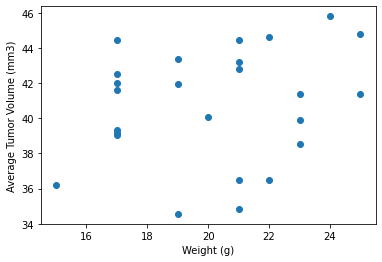

In [251]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#pulling the values to be graphed
weight_data = scatter_data_df.loc['Capomulin']['Weight (g)'].tolist()
tumor_data = 

print(tumor_data)
#sanity check
#len(weight_data)

#adding labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#plotting the graph
plt.scatter(weight_data, tumor_data)

plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
